In [1]:
import random
import warnings
warnings.filterwarnings('ignore')

import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


In [4]:
import pandas as pd
import numpy as np
import random

df = pd.DataFrame(
                  [
                      [6.82, 118, 5.7],
                      [6.36, 125, 6.8],
                      [5.39, 99, 4.5],
                      [5.50, 106, 5.35],
                      [6.39, 148, 8.4],
                      [9.13, 148, 9.87],
                      [7.17, 147, 8.87],
                      [7.72, 72, 7.64]
                   ], columns = ['cgpa',	'iq',	'package']
)

df

,cgpa,iq,package
0,6.82,118,5.70
1,6.36,125,6.80
2,5.39,99,4.50
3,5.50,106,5.35
4,6.39,148,8.40
5,9.13,148,9.87
6,7.17,147,8.87
7,7.72,72,7.64


In [5]:
# initial prediction

df['pre1'] = df['package'].mean()
df

,cgpa,iq,package,pre1
0,6.82,118,5.70,7.14125
1,6.36,125,6.80,7.14125
2,5.39,99,4.50,7.14125
3,5.50,106,5.35,7.14125
4,6.39,148,8.40,7.14125
5,9.13,148,9.87,7.14125
6,7.17,147,8.87,7.14125
7,7.72,72,7.64,7.14125


In [6]:
# calculating residual for stage 1
df['res1'] = df['package'] - df['pre1']
df

,cgpa,iq,package,pre1,res1
0,6.82,118,5.70,7.14125,-1.44125
1,6.36,125,6.80,7.14125,-0.34125
2,5.39,99,4.50,7.14125,-2.64125
3,5.50,106,5.35,7.14125,-1.79125
4,6.39,148,8.40,7.14125,1.25875
5,9.13,148,9.87,7.14125,2.72875
6,7.17,147,8.87,7.14125,1.72875
7,7.72,72,7.64,7.14125,0.49875


In [7]:
# training the first decision tree
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

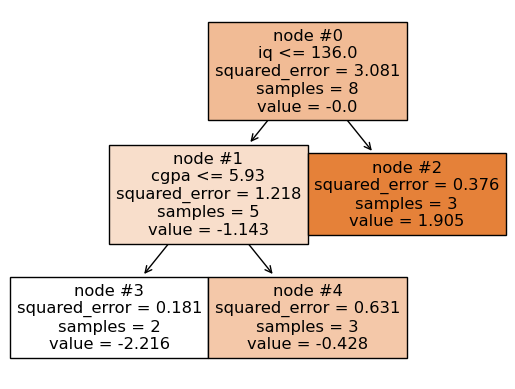

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(reg1, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [11]:
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df


def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pre1'])
  return round(num/den,2)

  den = sum(df['pre1'])
  return round(num/den,2)

In [13]:
df['pre2'] = df['pre1'] + df['leaf_entry1'].apply(return_logs)

In [14]:
df

,cgpa,iq,package,pre1,res1,leaf_entry1,pre2
0,6.82,118,5.70,7.14125,-1.44125,4,7.08125
1,6.36,125,6.80,7.14125,-0.34125,4,7.08125
2,5.39,99,4.50,7.14125,-2.64125,3,6.83125
3,5.50,106,5.35,7.14125,-1.79125,3,6.83125
4,6.39,148,8.40,7.14125,1.25875,2,7.41125
5,9.13,148,9.87,7.14125,2.72875,2,7.41125
6,7.17,147,8.87,7.14125,1.72875,2,7.41125
7,7.72,72,7.64,7.14125,0.49875,4,7.08125


In [15]:
df['res2'] = df['package'] - df['pre2']
df

,cgpa,iq,package,pre1,res1,leaf_entry1,pre2,res2
0,6.82,118,5.70,7.14125,-1.44125,4,7.08125,-1.38125
1,6.36,125,6.80,7.14125,-0.34125,4,7.08125,-0.28125
2,5.39,99,4.50,7.14125,-2.64125,3,6.83125,-2.33125
3,5.50,106,5.35,7.14125,-1.79125,3,6.83125,-1.48125
4,6.39,148,8.40,7.14125,1.25875,2,7.41125,0.98875
5,9.13,148,9.87,7.14125,2.72875,2,7.41125,2.45875
6,7.17,147,8.87,7.14125,1.72875,2,7.41125,1.45875
7,7.72,72,7.64,7.14125,0.49875,4,7.08125,0.55875


In [16]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

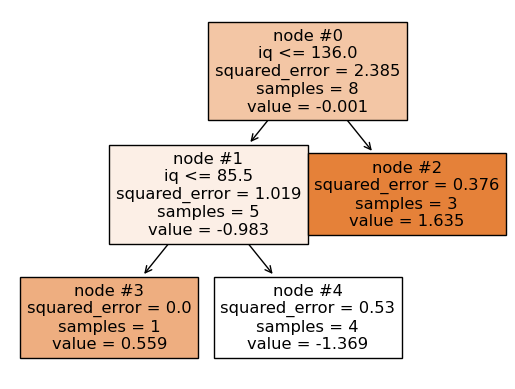

In [17]:
plot_tree(reg2, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [18]:
df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df

,cgpa,iq,package,pre1,res1,leaf_entry1,pre2,res2,leaf_entry2
0,6.82,118,5.70,7.14125,-1.44125,4,7.08125,-1.38125,4
1,6.36,125,6.80,7.14125,-0.34125,4,7.08125,-0.28125,4
2,5.39,99,4.50,7.14125,-2.64125,3,6.83125,-2.33125,4
3,5.50,106,5.35,7.14125,-1.79125,3,6.83125,-1.48125,4
4,6.39,148,8.40,7.14125,1.25875,2,7.41125,0.98875,2
5,9.13,148,9.87,7.14125,2.72875,2,7.41125,2.45875,2
6,7.17,147,8.87,7.14125,1.72875,2,7.41125,1.45875,2
7,7.72,72,7.64,7.14125,0.49875,4,7.08125,0.55875,3


In [22]:
df[['res1','res2']]

,res1,res2
0,-1.44125,-1.38125
1,-0.34125,-0.28125
2,-2.64125,-2.33125
3,-1.79125,-1.48125
4,1.25875,0.98875
5,2.72875,2.45875
6,1.72875,1.45875
7,0.49875,0.55875
